In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Initial Research** Malaria is a parasite spread through mosquito bites when mosquitos possess the parasite. For a mosquito to have the parasite, it must have injested the blood of an infected person. The infection process is repeated generally every week. 

Summary of Findings:

Malaria is a harmful disease that humans contract from parasite contaminated mosqitoes through blood transmission. Malaria is not common in America, but it is a very predominent disease in Africa where the climate is humid and Anopheles Mosquitoes are common. Malaria can be very fatal if it is not treated quickly after diagnosis and can lead to severe sickness and death. Even though it is fatal, it can be treated through perscription medication that alleviate the symptoms and eventually can the disease.

https://www.cdc.gov/malaria/causes/index.html
https://www.ncbi.nlm.nih.gov/books/NBK555962/figure/article-27309.image.f1/?report=objectonly

# Step 2: Compartment Models

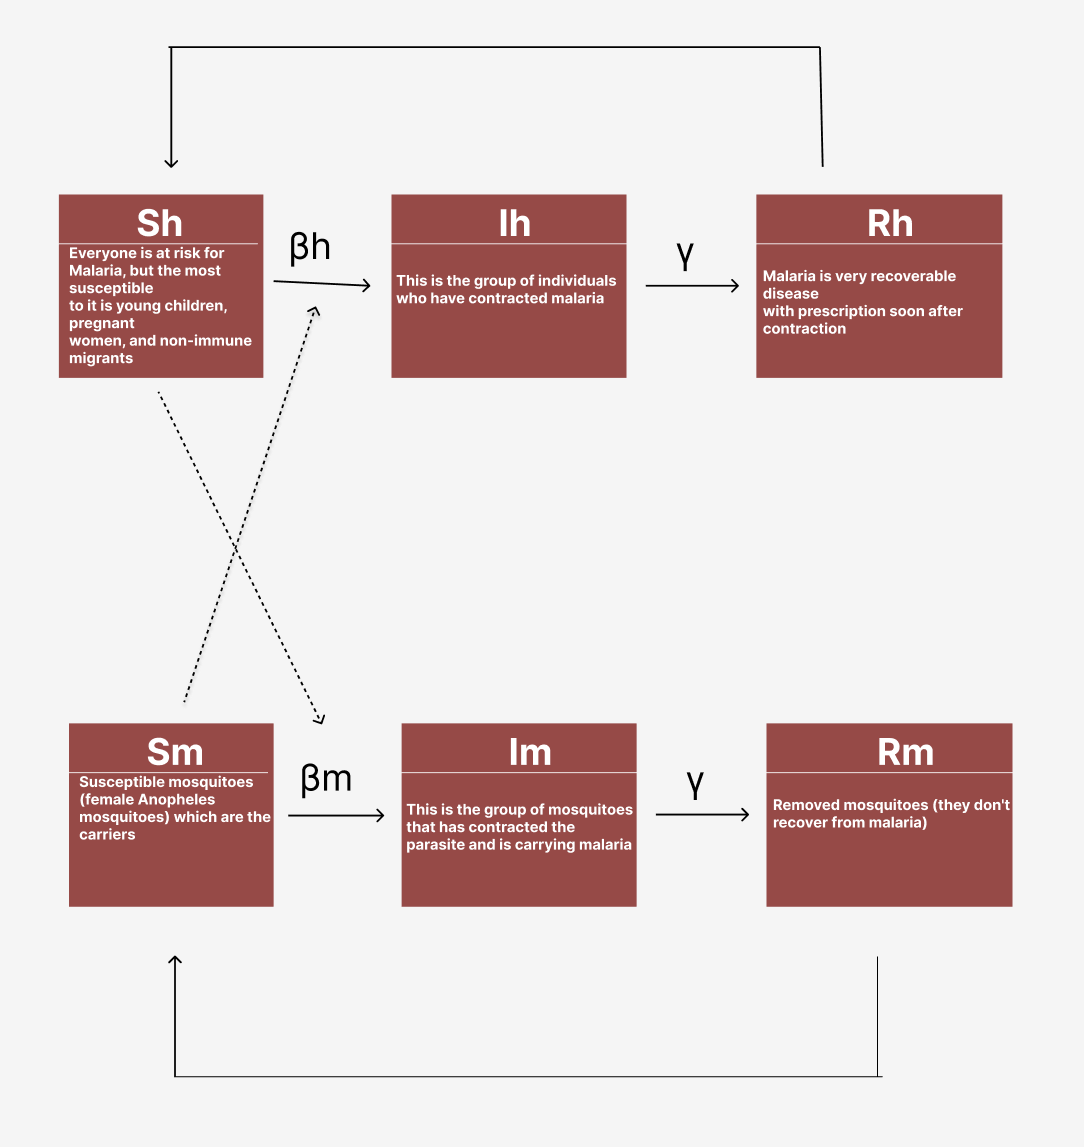

# Step 3: Parameter Investigation

WHO: According to the latest World malaria report, there were 249 million cases of malaria in 2022 compared to 244 million cases in 2021. The estimated number of malaria deaths stood at 608 000 in 2022 compared to 610 000 in 2021.

Rwanda: Rwanda is a small country with an estimated population of approximately 12 million, ***all at risk for malaria***.
for July-june 2022-2023, ***Projected number of severe cases***: 5,998 
July-june 2023-2024, 5,398 
July-june 2024-2025, 5,128 

'Human Bait' article:  "Many of the mosquitoes carry Plasmodium falciparum, a species of malaria parasite capable of killing within 24 hours of the first sign of symptoms if not treated"

"Over the past 15 years, since the start of an ambitious national plan funded in part by the United States and international partners, Rwanda has reduced malaria deaths by 80 percent...strengthening the country’s entire health system, and also by treating malaria as quickly as possible, distributing insecticide-treated bed nets, and spraying insecticides on the walls of homes in the regions at highest risk of the illness. "

"Despite the progress, however, there are still around 4 million cases every year in a country of more than 12 million people."
" 'We used to collect Anopheles gambiae sensu stricto...Now, the dominant species is Anopheles arabiensis.' The reason, he says, is insecticides...As one sub-species declines, another takes its place."

# Step 4: ODE Integration

In [23]:
from plotnine import *
from scipy.integrate import odeint

# Dr. Goadrich's Code

In [24]:
#Infected Mosquitoes
Im = .001
#Infected Mosquitoes
I = 0.001
#Susceptible
S = 1 - I
#Recovered
R = 0

num_contacts = 15
prob_trans = 0.03
disease_duration = 10

beta = num_contacts * prob_trans
gamma = 1 / disease_duration

#got 60 months from lab description
months = 60

r_0 = beta / gamma
r_0

4.499999999999999

In [25]:
def SIR(u, t):
    S, I, R = u
    dS = -beta * Im * S 
    dI = beta * I * S - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

In [26]:
time = np.linspace(0, months, months * 30)
pop = odeint(SIR, [S, I, R], time)

In [27]:
df = pd.DataFrame(pop, columns=["Susceptible", "Infected", "Recovered"])
df["Time"] = time

In [28]:
dfmelt=pd.melt(df, id_vars=['Time'], 
               value_vars=["Susceptible", "Infected", "Recovered"], 
               var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible,0.999000
1,0.033352,Susceptible,0.998985
2,0.066704,Susceptible,0.998970
3,0.100056,Susceptible,0.998955
4,0.133407,Susceptible,0.998940
...,...,...,...
5395,59.866593,Recovered,252945.293373
5396,59.899944,Recovered,255814.392690
5397,59.933296,Recovered,258715.978895
5398,59.966648,Recovered,261650.419195


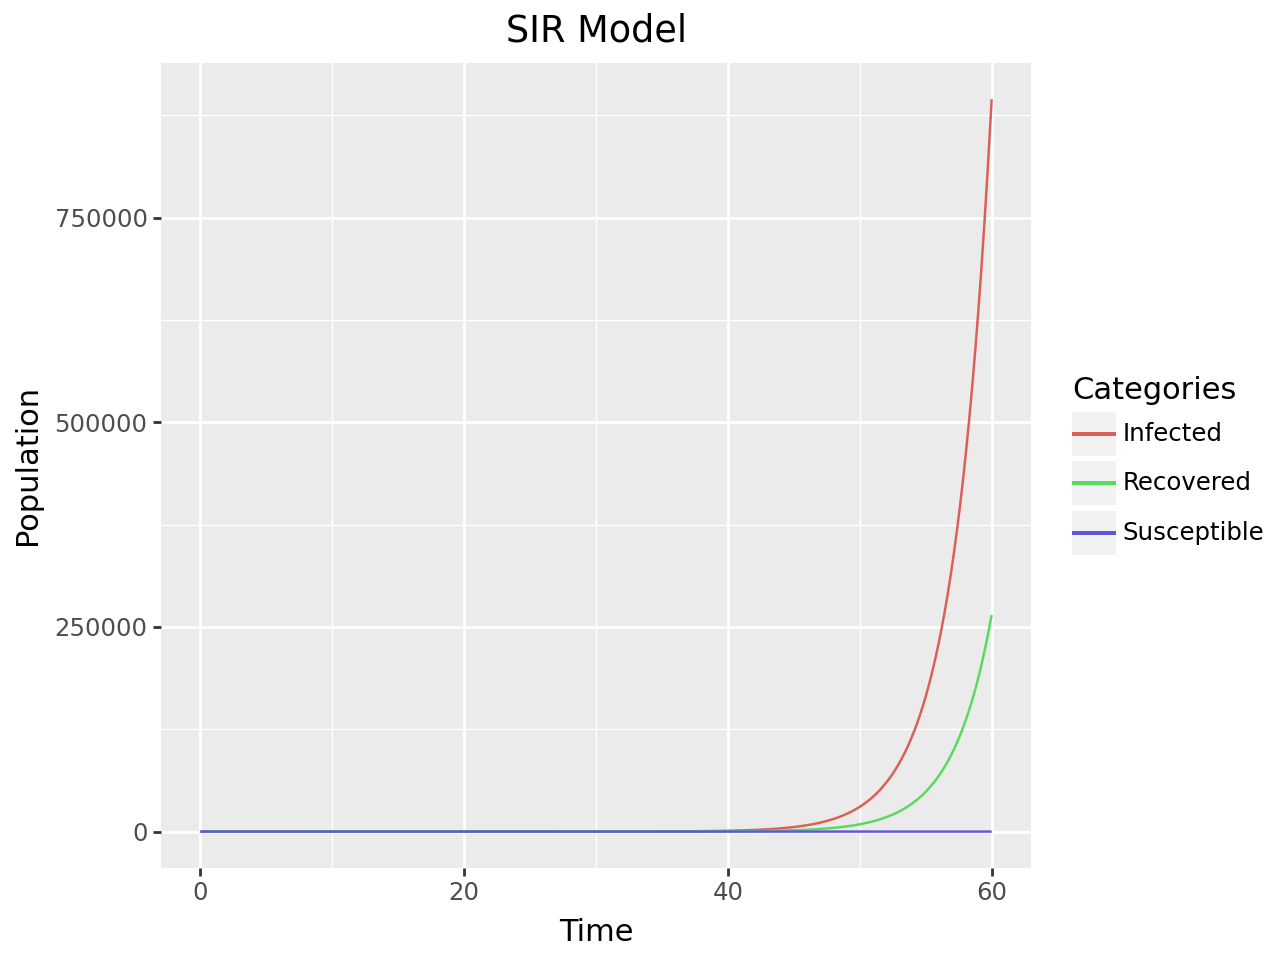

In [29]:
(
    ggplot(dfmelt, aes(x="Time", y="Population", color="Categories"))
    + geom_line()
    + labs(title="SIR Model")
)

# My code

My equations:

    
dSh/dt = -betah * Sh * Im / poph

dIh/dt = betah * Sh * Im / poph - gammah * Ih
    
dRh/dt = gammah * Ih
    
dSm/dt = -betam * Sm * Ih / poph
    
dIm/dt = betam * Sm * Ih / poph - gammam * Im

In [30]:
#define everything here

# betah is transmission from mosquito to human
#page xvii of 
#https://cdn.who.int/media/docs/default-source/malaria/world-malaria-reports/world-malaria-report-2023-spreadview.pdf?sfvrsn=bb24c9f0_4
#says "In 2022, malaria case incidence was 58 per 1000 population at risk."

betah = 0.058

# betam is transmission from human to mosquito
#" For the Anopheles mosquito to become infective, they must bite, or take a blood meal, 
#from a person already infected with the malaria parasites. 
#About one week later, that same mosquito will bite the next person and subsequently inject the parasites via her saliva. "

# from https://www.cdc.gov/malaria/causes/index.html
#so, a mosquite has the possibility to be infected once a week

betam = 0.143

# gammah is recovery rate for humans
gammah = 0.05

# gammam is mosquito death rate
gammam = 0.05263158

# Total human population in Rwanda in mils, https://www.pmi.gov/wp-content/uploads/2024/04/Rwanda_PMI-Fact-Sheet-InCountry_FY2024_CP.pdf
poph = 13.8

# Total mosquito population in Rwanda in mils
popm = 10  
# start number of infected humans
Ih0 = .001 

# Start number of infected mosquitoes
Im0 = .01     

#starting number of susceptible humans
Sh0 = poph - Ih0  
#Sh0 = 0
# Start susceptible mosquitoes
Sm0 = popm - Im0 
#Sm0 = 0
#Recovered humans 
Rh0 = 0  
#recovered mosquitos
Rm0 = 0
months = 60





In [31]:
#model here

def SIR(u,t):
    Sh, Ih, Rh, Sm, Im, Rm = u
    dShdt = -betah * Sh * Im 
    dIhdt = betah * Sh * Im  - gammah * Ih
    dRhdt = gammah *Ih
    dSmdt = -betam * Sm * Ih 
    dImdt = betam * Sm * Ih  - gammam * Im
    dRmdt = gammam *Im
    return np.array([dShdt, dIhdt, dRhdt, dSmdt, dImdt, dRmdt])

In [32]:
#too many things in ODEint, so I needed to do an array

#Initially used this resource to help: https://www.youtube.com/watch?v=cd21cNd8KaE
#changed to mimic Goadrich's code.
time = np.linspace(0, months, months * 30)
pop = odeint(SIR,[Sh0, Ih0, Rh0, Sm0, Im0, Rm0],time)



In [33]:


df = pd.DataFrame(pop, columns=["Susceptible_Humans", "Infected_Humans", "Recovered_Humans", 
                                "Susceptible_Mosquitoes",'Infected_Mosquitoes', "Recovered_Mosquitoes"])
df["Time"] = time
df

,Susceptible_Humans,Infected_Humans,Recovered_Humans,Susceptible_Mosquitoes,Infected_Mosquitoes,Recovered_Mosquitoes,Time
0,13.799000,0.001000,0.000000,9.990000e+00,0.010000,0.000000,0.000000
1,13.798733,0.001266,0.000002,9.989946e+00,0.010036,0.000018,0.033352
2,13.798464,0.001532,0.000004,9.989879e+00,0.010085,0.000035,0.066704
3,13.798194,0.001799,0.000007,9.989800e+00,0.010147,0.000053,0.100056
4,13.797922,0.002067,0.000010,9.989708e+00,0.010221,0.000071,0.133407
...,...,...,...,...,...,...,...
1795,0.000450,1.070225,12.729325,2.177157e-13,0.624702,9.375298,59.866593
1796,0.000449,1.068442,12.731109,1.949854e-13,0.623607,9.376393,59.899944
1797,0.000449,1.066663,12.732889,1.727513e-13,0.622513,9.377487,59.933296
1798,0.000448,1.064886,12.734666,1.511052e-13,0.621421,9.378579,59.966648


In [34]:
dfmelt = pd.melt(df, id_vars=['Time'], 
                    value_vars=['Susceptible_Humans', 'Infected_Humans', 'Recovered_Humans',
                                'Susceptible_Mosquitoes', 'Infected_Mosquitoes', "Recovered_Mosquitoes"],
                    var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible_Humans,13.799000
1,0.033352,Susceptible_Humans,13.798733
2,0.066704,Susceptible_Humans,13.798464
3,0.100056,Susceptible_Humans,13.798194
4,0.133407,Susceptible_Humans,13.797922
...,...,...,...
10795,59.866593,Recovered_Mosquitoes,9.375298
10796,59.899944,Recovered_Mosquitoes,9.376393
10797,59.933296,Recovered_Mosquitoes,9.377487
10798,59.966648,Recovered_Mosquitoes,9.378579


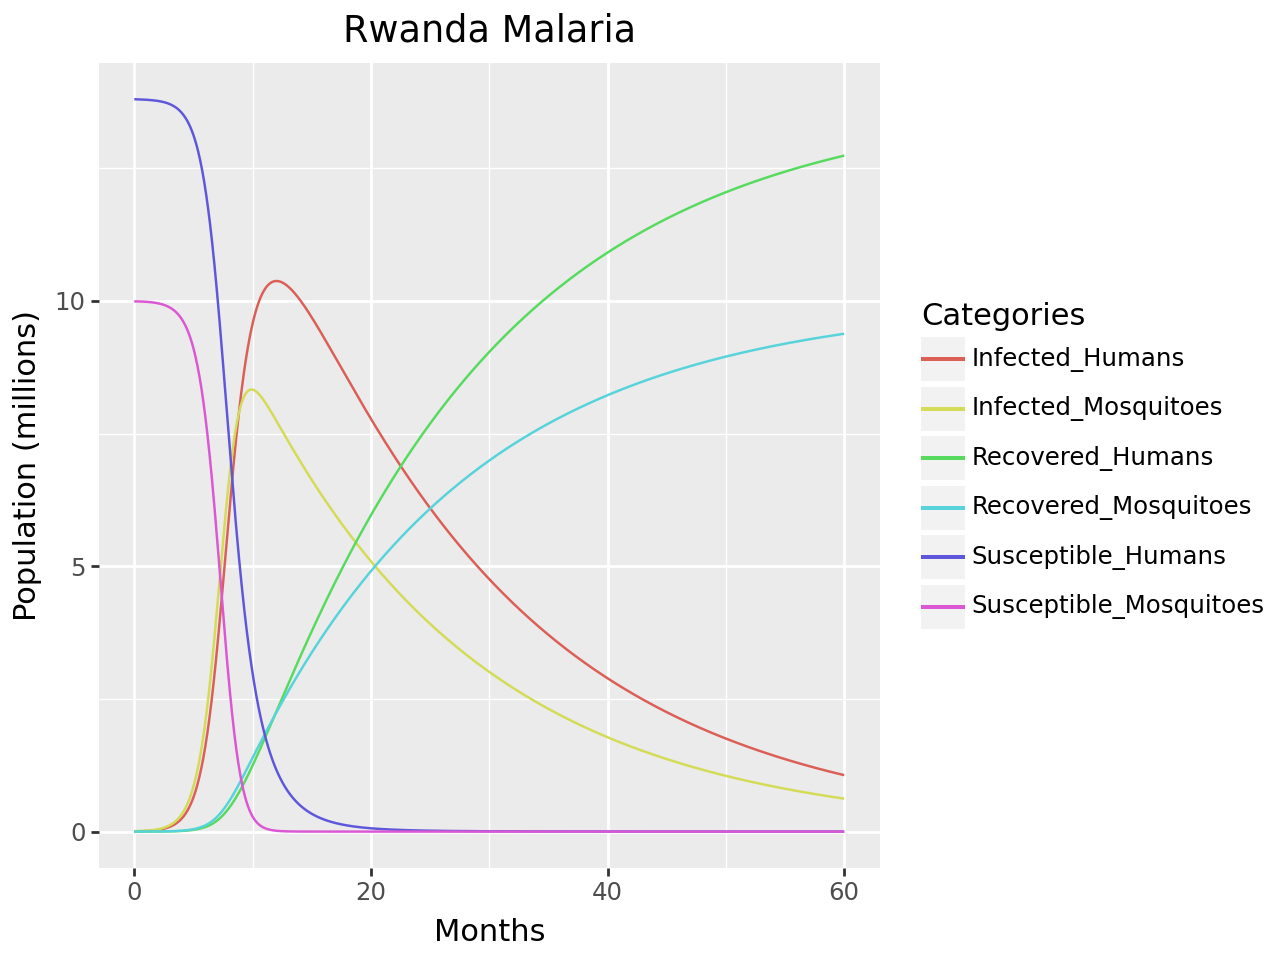

In [35]:
(
    ggplot(dfmelt, aes(x='Time', y='Population', color='Categories')) +
        geom_line() +
        labs(title='Rwanda Malaria',
             x='Months', 
             y='Population (millions)')
)

# Step 6: Drug Therapy

In [36]:
def v(t):
    if t < 3:
        return 1
    return 0

In [37]:
#add a factor for vaccination rates
#Goadrich's example

'''
def SIRV(u,t):
    Sh, Ih, Rh, Sm, Im, Rm, V = u
    dShdt = -betah * Sh * Im / poph -alpha * v(t) * Sh
    dSmdt = -betam * Sm * Ih / poph -alpha * v(t) * Sh
    dIhdt = betah * Sh * Im / poph - gammah * Ih
    dImdt = betam * Sm * Ih / poph - gammam * Im
    dRhdt = gammah *Ih
    dRmdt = gammam *Im
    #added this
    dV = alpha * v(t) * S
    return np.array([dShdt, dIhdt, dRhdt, dSmdt, dImdt, dRmdt, dV])
'''

def SIRV(u,t):
    Sh, Ih, Rh, Sm, Im, Rm, V = u
    dShdt = -betah * Sh * Im -alpha * v(t) * Sh
    dSmdt = -betam * Sm * Ih 
    dIhdt = betah * Sh * Im - gammah * Ih
    dImdt = betam * Sm * Ih - gammam * Im
    dRhdt = gammah *Ih
    dRmdt = gammam *Im
    #added this
    dV = alpha * v(t) * Sh
    return np.array([dShdt, dIhdt, dRhdt, dSmdt, dImdt, dRmdt, dV])

In [38]:
V = 0
alpha = .02
time = np.linspace(0, months, months*30)
population = odeint(SIRV, [Sh0, Ih0, Rh0, Sm0, Im0, Rm0, V], time)

In [39]:
df = pd.DataFrame(population, columns= ["Susceptible_Humans", "Infected_Humans", "Recovered_Humans", 
                                "Susceptible_Mosquitoes",'Infected_Mosquitoes', "Recovered_Mosquitoes", "Vaccinated"])
df["Time"] = time

In [40]:
dfmelt = pd.melt(df, id_vars=["Time"], value_vars= ["Susceptible_Humans", "Infected_Humans", "Recovered_Humans", 
                                "Susceptible_Mosquitoes",'Infected_Mosquitoes', "Recovered_Mosquitoes", "Vaccinated"], 
                 var_name = "Categories", value_name= "Population")

In [41]:
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible_Humans,13.799000
1,0.033352,Susceptible_Humans,13.789531
2,0.066704,Susceptible_Humans,13.780068
3,0.100056,Susceptible_Humans,13.770610
4,0.133407,Susceptible_Humans,13.761156
...,...,...,...
12595,59.866593,Vaccinated,0.802052
12596,59.899944,Vaccinated,0.802052
12597,59.933296,Vaccinated,0.802052
12598,59.966648,Vaccinated,0.802052


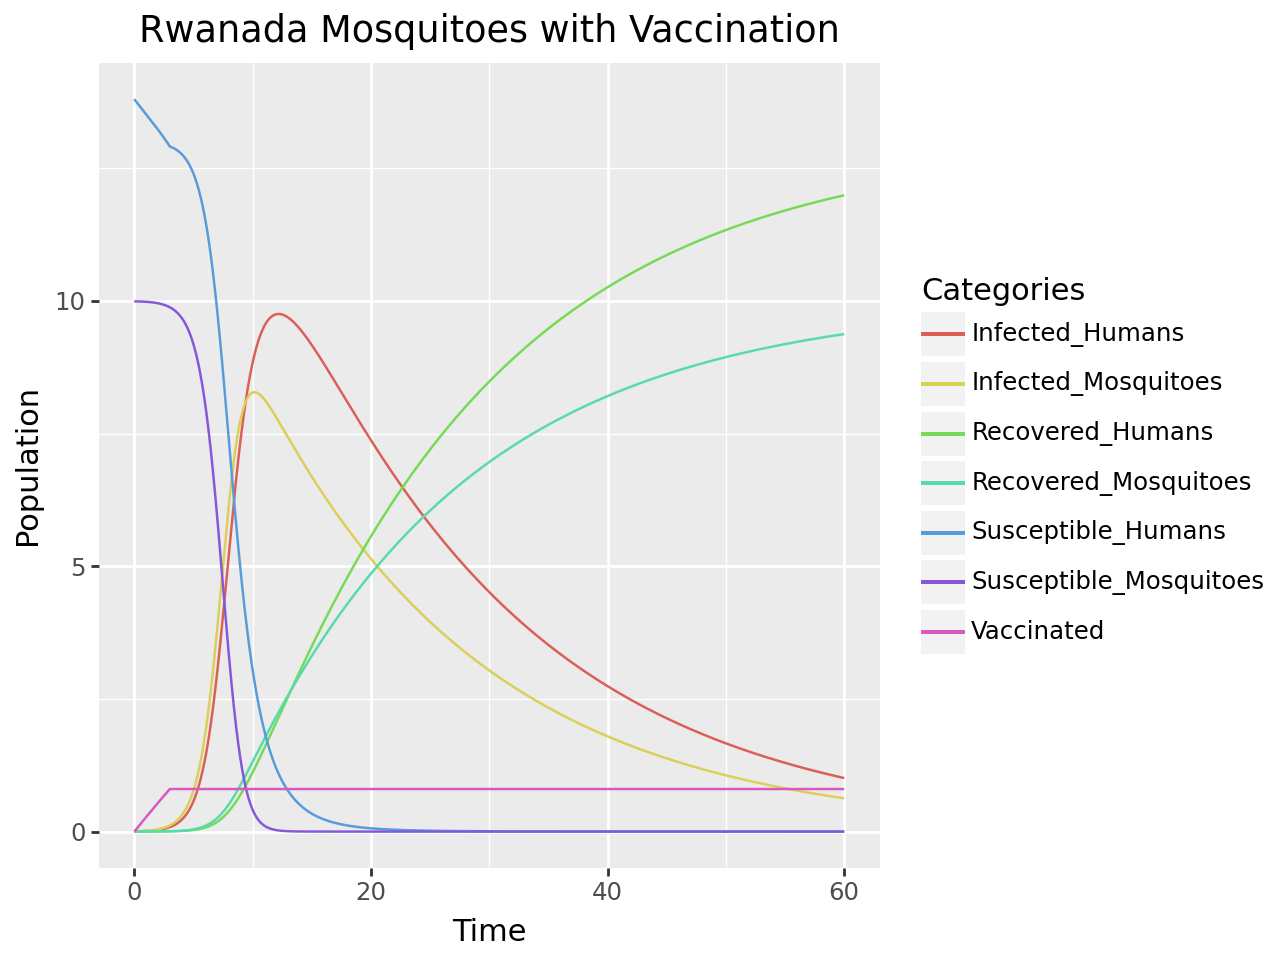

In [42]:
(
   ggplot(dfmelt, aes(x="Time", y="Population", color="Categories"))
    + geom_line()
    + labs(title="Rwanada Mosquitoes with Vaccination")
)

# Step 8: Conclusion

In our first model, we found for Rwanda the interaction of malaria with humans and mosquitos. We found that the illness number of humans is related to mosquitoes, where when humans see a peak in illness mosquitos do soon after. In our second model, we show human and moquito malaria interaction with the presence of vaccines.

Our model seems accurate to our assumptions on population numbers and rates of change because they were based on reliable data sources, although slightly outdated. Some data we found was from 2022, and we were trying to make predictions for 2024. We also had a hard time with assumptions for moquuito tendencies, as we had trouble finding data representation.

These innacuracies with the data are an important problem, and we would adjust our model going forward to have more current data, and we would also include more data on mosquitos. Also, we need improvment with our second model since we are not seeing expected results.